# K-means Clustering Algorithm

## Overview
- [1. What is k-means clustering?](#1)
- [2. Pros and cons of k-means](#2)
- [3. K-means algorithm and implementation](#3)
- [4. K-means algorithm in sklearn](#4)
- [5. References](#4)


<a name='1' ></a>
## 1. What is k-means clustering?

Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters.

The **k-means clustering** method is an [unsupervised machine learning](https://en.wikipedia.org/wiki/Unsupervised_learning) technique used to identify clusters of data objects in a dataset, is a **partitional clustering** algorithm that divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object. These techniques require the user to specify the number of clusters, indicated by the variable k. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. 

**Note: In general, clustering includes 3 types: Partitional clustering, Hierarchical clustering and Density-based clustering**

<a name='2' ></a>
## 2. Pros and cons of k-means

Both k-means and other partitional clustering algorithms are **nondeterministic**, meaning they could produce different results from two separate runs even if the runs were based on the same input.

Partitional clustering methods have several strengths:
- They work well when clusters have a **spherical shape**.
- They’re **scalable** with respect to algorithm complexity.

They also have several weaknesses:
- They’re not well suited for clusters with **complex shapes** and different sizes.
- They break down when used with clusters of different **densities**.

<a name='3' ></a>
## 3. K-means algorithm and implementation
Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. **Centroids** are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called **expectation maximization**. The **expectation** step assigns each data point to its nearest centroid. Then, the **maximization** step computes the mean of all the points for each cluster and sets the new centroid. Here’s what the conventional version of the k-means algorithm looks like:

<div style="width:image width px; font-size:80%; text-align:center;"><img src='images/kmeans-algorithm.webp' alt="alternate text" width="width" height="height" style="width:600px;height:200px;" /> Figure 1. k-means algorithm </div>
<img src="images/kmeans-algorithm.webpp"  width="400" height="400">

The quality of the cluster assignments is determined by computing the [sum of the squared error (SSE)](https://en.wikipedia.org/wiki/Residual_sum_of_squares) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

The figure below shows the centroids and SSE updating through the first five iterations from two different runs of the k-means algorithm on the same dataset:

<img src="images/centroids_iterations.webp"  width="400" height="400">

In [1]:
# import package
import numpy as np
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt

In [2]:
def kmeans(X, k, max_iter=100, random_state=0):
    """
    Implement k-means clustering algorithm
    
    Arguments:
        X: input data
        k: the number of centroids
        max_iter: the max number of iterations, default 100
        random_state: fix random, default=0
    
    Returns:
        labels: an array contains closest centroid corresponding each point
    """
    
    # randomly initialize k centroids
    np.random.seed(random_state)
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    
    for _ in range(max_iter): 
        # assign each point to its closest centroid
        distances = cdist(X, centroids ,'euclidean')
        labels = np.argmin(distances, axis=1)
        
        # update centroids by taking mean of cluster it belongs to
        centroids = [X[labels == label].mean(axis=0) for label in range(k)]
        
    return labels

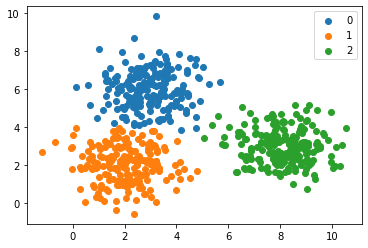

In [3]:
# Generate data for clustering
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 200
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
k = 3

# Test function
labels = kmeans(X, k, 100)

# Plot
labelList = np.unique(labels)
for label in labelList:
    plt.scatter(X[labels == label, 0] , X[labels == label, 1] , label=label)
plt.legend()
plt.show()

<a name='4' ></a>
## 4. K-means algorithm in `sklearn`

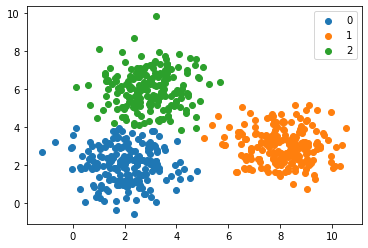

In [4]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=k, max_iter=100).fit(X)
labels = cluster.labels_

# Plot
labelList = np.unique(labels)
for label in labelList:
    plt.scatter(X[labels == label, 0] , X[labels == label, 1] , label=label)
plt.legend()
plt.show()

<a name='5' ></a>
## 5. References
- [K-Means Clustering in Python: A Practical Guide](https://realpython.com/k-means-clustering-python/)
- [Clustering, sklearn](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Blog: Machine Learning cơ bản](https://machinelearningcoban.com/2017/01/01/kmeans/)